# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [2]:
X_train = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/X_train_normalized.csv", index_col=[0])
X_test = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/X_test_normalized.csv", index_col=[0])
y_train = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/y_train.csv", index_col=[0])
y_test = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/y_test.csv", index_col=[0]).reset_index(drop=True)

In [3]:
X_train.head(5)

,Symbol,Volume,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,...,Low 60-Day Shifted Differenced,Open 60-Day Shifted Differenced,Volume 26-Day SMA Differenced,Adj Close 7-Day Upper Bollinger Band Differenced,Adj Close 7-Day Lower Bollinger Band Differenced,True Range 26-Day SMA Differenced,Adj Close Differenced,High Differenced,Low Differenced,Open Differenced
0,-1.439324,-0.326871,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,-0.387284,-0.412467,...,-0.030577,-0.068139,-0.006229,-0.002604,0.005519,0.104504,-0.020330,0.008943,0.015877,0.062622
1,-1.069061,-0.344648,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,2.582087,-0.412467,...,0.048578,0.145553,0.020691,0.023690,0.018514,-0.090630,-0.107768,0.032258,0.030478,0.096788
2,1.641263,-0.295005,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,-0.387284,-0.412467,...,0.165427,0.216785,0.006646,0.188618,-0.086104,0.105746,0.125379,0.102205,0.158246,0.137784
3,-0.343346,0.285874,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,2.582087,-0.412467,...,0.097579,0.010215,-0.006915,0.102354,0.070641,0.091515,0.136523,0.094434,0.004925,0.076288
4,1.256190,-0.328472,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,2.534516,-0.387284,-0.412467,...,0.433048,0.448281,0.008337,1.265493,0.427053,-1.099516,0.521058,0.755054,0.866425,0.817676


In [4]:
X_test.head(5)

,Symbol,Volume,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,...,Low 60-Day Shifted Differenced,Open 60-Day Shifted Differenced,Volume 26-Day SMA Differenced,Adj Close 7-Day Upper Bollinger Band Differenced,Adj Close 7-Day Lower Bollinger Band Differenced,True Range 26-Day SMA Differenced,Adj Close Differenced,High Differenced,Low Differenced,Open Differenced
0,-1.054250,-0.283809,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,-0.387284,2.424439,...,0.067425,-0.381554,0.005334,0.193442,-0.503912,-0.458573,-0.961706,-0.123181,-0.779922,0.216366
1,0.449017,-0.359859,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,2.534516,-0.387284,-0.412467,...,0.794898,-0.085951,0.014579,-0.116220,-0.000128,-0.614296,-0.682605,0.832754,-0.079040,1.432648
2,1.419105,-0.198809,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,-0.387284,-0.412467,...,1.507302,0.783077,0.128148,0.093043,-1.302666,1.902798,-4.471950,1.435083,-4.328154,1.015831
3,-1.261598,-0.272044,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,-0.387284,-0.412467,...,0.809979,-0.417161,0.149796,4.610485,-6.956384,10.022441,-10.617055,-3.111471,-14.261016,-12.872375
4,-0.128593,-0.255868,-0.21136,-0.21136,2.806268,-0.279992,-0.222173,-0.394553,-0.387284,-0.412467,...,0.150350,-1.781241,0.070288,0.030323,0.063262,0.121352,-0.433286,-0.263072,-0.294412,0.025041


In [5]:
y_train.head(5)

,1-week Forward Return Sign
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,1.0


In [6]:
y_test.head(5)

,1-week Forward Return Sign
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


# Fit Logistic Regression Model

### Check class imbalance

<Axes: title={'center': 'Frequency of each class in the training and test targets'}>

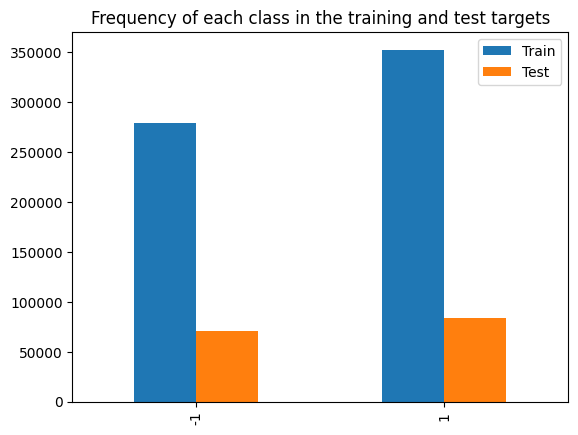

In [7]:
# Examine class imbalance in training and test sets
train_classes = y_train.value_counts().sort_index()
test_classes = y_test.value_counts().sort_index()
class_freq = pd.DataFrame(data=zip(train_classes, test_classes), columns=['Train', 'Test'], index=[-1, 1])
class_freq.plot(kind='bar', title='Frequency of each class in the training and test targets')

### Parameter Optimization

In [8]:
# Imports
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
grid = {
    'C': [0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create base model
lr = LogisticRegression()

# Create time series split object to allow for CV without look-ahead bias
tscv = TimeSeriesSplit(n_splits=4)

In [9]:
# Create random search object
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=grid,
    n_iter=12,
    cv=tscv,
    n_jobs=-1,
    scoring='accuracy',
    verbose=3,
    refit=False
)

# Fit the grid search to data
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=12. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colu

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
                   estimator=LogisticRegression(), n_iter=12, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   refit=False, scoring='accuracy', verbose=3)

In [10]:
# Get results of all trained models
cv_results = random_search.cv_results_
print(cv_results)

# Get best params and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Best params are {best_params}")
print(f"Best accuracy score is {best_score}")

# Save best parameters
import pickle
with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

{'mean_fit_time': array([16.3807618 , 37.58068597, 50.65580976, 43.84621483, 87.58999753,
       44.48053086]), 'std_fit_time': array([ 6.31510228, 18.33719287, 12.47148208, 14.26176153, 37.5110296 ,
        8.40978905]), 'mean_score_time': array([0.06926823, 0.09812433, 0.07107502, 0.07166922, 0.06288916,
       0.06931931]), 'std_score_time': array([0.00235578, 0.04157679, 0.00471602, 0.00300819, 0.01035056,
       0.01475591]), 'param_solver': masked_array(data=['liblinear', 'liblinear', 'liblinear', 'liblinear',
                   'liblinear', 'liblinear'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1],
             mask=[False, False, False, False, False, False],
      

### Train model

In [11]:
# Fit model with best params
lr = LogisticRegression(**best_params)
lr.fit(X_train, y_train)
lr.coef_

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 2.32458463e-03, -3.31273068e-03, -2.20126832e-02,
        -1.31733505e-02, -1.07692590e-02,  0.00000000e+00,
        -4.76058729e-02,  8.42662095e-03, -1.43130079e-03,
         2.79620081e-03,  5.29512605e-03,  1.28350803e-02,
         1.32580593e-02, -4.39929264e-03,  2.18967738e-02,
         4.41077789e-02,  5.83979045e-02, -2.82336124e-03,
         2.44124543e-02,  1.77991385e-02,  2.71159091e-02,
        -2.64756358e-03,  0.00000000e+00, -1.71621432e-02,
        -1.10832575e-02, -7.12273320e-03, -2.70185081e-02,
        -8.49908557e-03,  1.80612982e-02, -2.61883754e-02,
        -3.29995312e-03,  3.50087535e-02, -3.43234306e-02,
         6.39814053e-03, -3.39965801e-03, -1.30794338e-02,
        -6.13037662e-02, -1.16067913e-01, -1.23545857e-02,
        -2.27103082e-02,  5.32777190e-02, -1.36396144e-02,
        -3.87734573e-02, -5.49015735e-02,  2.14889940e-02,
        -4.70907655e-02, -9.33203383e-03,  2.12640279e-01,
         8.79692375e-02,  1.19206274e-02, -1.03295162e-0

In [12]:
# Save model
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr, f)